In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

In [26]:
np.random.seed(42)

## Daten laden

In [27]:
import pickle
with open('data/train_test_data.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [28]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.isnull())

   date_number  total_volume  type  dist_to_california  dist_to_mexico  \
2    -1.714542     -0.477527     1            0.618499        0.266866   
3    -1.714542     -0.325751     0            0.618499        0.266866   
4    -1.714542     -0.478220     1            0.578210       -0.074620   
5    -1.714542     -0.293107     0            0.578210       -0.074620   
6    -1.714542     -0.453108     1           -1.157557        0.620805   

   region  Atlanta  Baltimore/Washington  Boston  California  ...  \
2     1.0        0                     0       0           0  ...   
3     1.0        0                     0       0           0  ...   
4     1.0        0                     0       0           0  ...   
5     1.0        0                     0       0           0  ...   
6     0.0        0                     0       0           0  ...   

   Miami/Ft. Lauderdale  New York  Orlando  Philadelphia  Portland  \
2                     0         0        0             0         0   


In [29]:
print(X_train.isnull().sum(), y_train.isnull().sum(), X_test.isnull().sum(), y_test.isnull().sum())

date_number             0
total_volume            0
type                    0
dist_to_california      0
dist_to_mexico          0
region                  0
Atlanta                 0
Baltimore/Washington    0
Boston                  0
California              0
Hartford/Springfield    0
Los Angeles             0
Miami/Ft. Lauderdale    0
New York                0
Orlando                 0
Philadelphia            0
Portland                0
Raleigh/Greensboro      0
Richmond/Norfolk        0
San Francisco           0
Seattle                 0
Tampa                   0
dtype: int64 0 date_number             0
total_volume            0
type                    0
dist_to_california      0
dist_to_mexico          0
region                  0
Atlanta                 0
Baltimore/Washington    0
Boston                  0
California              0
Hartford/Springfield    0
Los Angeles             0
Miami/Ft. Lauderdale    0
New York                0
Orlando                 0
Philadelphia           

In [30]:
X_train[:10]
feature_names = X_train.columns
feature_names

Index(['date_number', 'total_volume', 'type', 'dist_to_california',
       'dist_to_mexico', 'region', 'Atlanta', 'Baltimore/Washington', 'Boston',
       'California', 'Hartford/Springfield', 'Los Angeles',
       'Miami/Ft. Lauderdale', 'New York', 'Orlando', 'Philadelphia',
       'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'San Francisco',
       'Seattle', 'Tampa'],
      dtype='object')

# Training Modellen

### Test für verschiedene n_neighbors-Werte

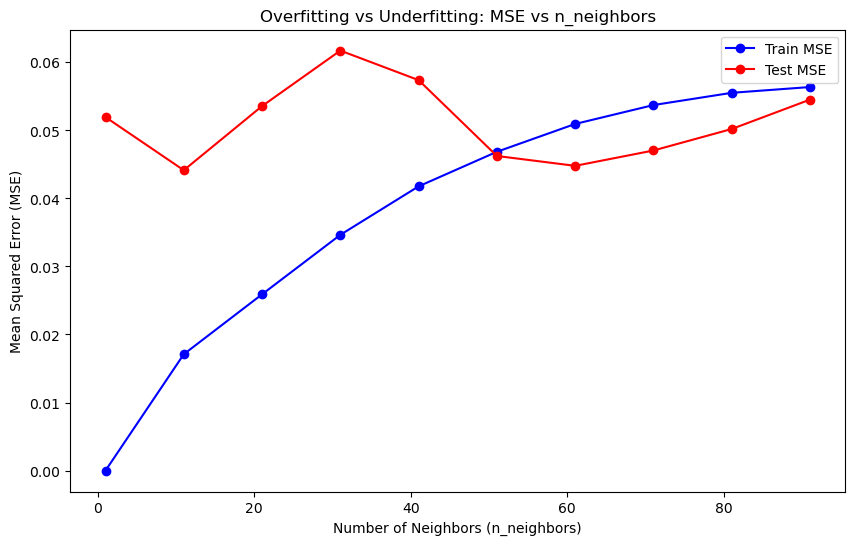

In [31]:
# Liste der zu versuchenden n_neighbors-Werte
n_neighbors_range = np.arange(1, 100, 10)

# Arrays zum Speichern von MSE-Werten für Trainings- und Testmengen
train_mse_values = []
test_mse_values = []

# Schleife über die verschiedenen n_neighbors-Werte
for n_neighbors in n_neighbors_range:
    # Erstellen und Anpassen des KNN-Modells
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Vorhersage/Predict  für die Trainingsmenge und Berechnung des MSE
    y_train_pred = knn.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mse_values.append(train_mse)
    
    # Vorhersage/Predict  für die Testmenge und Berechnung des MSE
    y_test_pred = knn.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_values.append(test_mse)

# Plotting / Aufzeichnung der MSEs von Training und Test
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, train_mse_values, label="Train MSE", marker='o', color='blue')
plt.plot(n_neighbors_range, test_mse_values, label="Test MSE", marker='o', color='red')

plt.title('Overfitting vs Underfitting: MSE vs n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

plt.show()


## Der optimale Wert für Overfitting und Underfitting ist 45

## mit Kombinationen von verschiedenen Parametern 

In [32]:
n_neighbors_values = np.arange(1, 100, 10)
weights_values = ['uniform', 'distance']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
p_values = [1, 2]  # p=1 -> Manhattan, p=2 -> Euclidean
 
best_params = None
lowest_error = float('inf')

#  Schleife über alle Kombinationen von Hyperparametern
for n_neighbors in n_neighbors_values:
    for weights in weights_values:
        for algorithm in algorithm_values:
            for p in p_values:
                #  fit KNN model
                knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
                knn_regressor.fit(X_train, y_train)

                # Predict test set und mean squared error
                y_pred = knn_regressor.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)

                # Wenn das aktuelle Modell den geringsten Fehler aufweist, aktualisieren Sie die besten Parameter
                if mse < lowest_error:
                    lowest_error = mse
                    best_params = {
                        'n_neighbors': n_neighbors,
                        'weights': weights,
                        'algorithm': algorithm,
                        'p': p
                    }

# Ausgabe der besten Hyperparameter und des geringsten Fehlers
print("Beste Parameter:", best_params)
print("Geringster mittlerer quadratischer Fehler:", lowest_error)

Beste Parameter: {'n_neighbors': 91, 'weights': 'distance', 'algorithm': 'auto', 'p': 1}
Geringster mittlerer quadratischer Fehler: 0.04343028726665565


##### Versucht mit oben mit verschiedenen Werten und anderen Parametern, die beste, was ich sehen konnte, ist, wenn n_neighhnors = 45, mit obigen Diagramm

In [33]:
# Define the KNN model
#  erster Versuch mit n_neighbors=3 manuell dann mit obigem Diagramm, um die besten Nachbarn zu finden
knn_model = KNeighborsRegressor(n_neighbors=45) 
#n_neighbors: Die Anzahl der zu verwendenden Nachbarn (der Wert von K
#weights: Wie die Nachbarn bei Vorhersagen gewichtet werden sollen
#uniform: Alle Nachbarn werden gleich gewichtet (Standard).
#distance: Näher gelegene Nachbarn werden stärker gewichtet (gewichtet mit dem Kehrwert ihrer Entfernung).
# weights='distance'.

In [34]:
# Trainieren Sie das KNN-Modell anhand der Trainingsdaten
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=45)

In [35]:
# Vorhersage für Trainings- und Testreihen
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [36]:
# Berechnen der Metriken für die Trainingsmenge
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

In [37]:
#  Berechnung der Metriken für den Testsatz
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

In [38]:
knn_results = {
    "train_mae": train_mae,
    "train_mse": train_mse,
    "train_rmse": train_rmse,
    "test_mae": test_mae,
    "test_mse": test_mse,
    "test_rmse": test_rmse
}
knn_results

{'train_mae': 0.15329406223083547,
 'train_mse': 0.04392527616877213,
 'train_rmse': 0.20958357800355476,
 'test_mae': 0.17283434606481482,
 'test_mse': 0.05170845122813786,
 'test_rmse': 0.22739492348805385}

In [39]:
#Die Trainingsfehler (MAE, MSE, RMSE) sind etwas geringer als die Testfehler, 
#was zu erwarten ist und auf eine recht gute Anpassung hinweist. 
#Der Unterschied zwischen Trainings- und Testfehlern ist nicht allzu groß,
#was darauf hindeutet, dass das Modell recht gut verallgemeinert.
#MAE und RMSE sind bei der Testmenge höher als bei der Trainingsmenge, aber nicht sehr viel, 
#was bedeutet, dass das Modell keine signifikante Überanpassung aufweist.

In [40]:
# Berechnen Sie den R²-Wert für die Trainingsdaten
train_r2 = knn_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2}")

Training R² Score: 0.7395726697961976


In [41]:
# Berechnen Sie den R²-Wert für Testdaten
test_r2 = knn_model.score(X_test, y_test)
print(f"Test R² Score: {test_r2}")

Test R² Score: 0.5882182020212946


 Cross Validation

###### Die Cross Validation ist eine Technik zur Bewertung der Leistung und Verallgemeinerungsfähigkeit eines Modells. Anstatt die Daten einmal in Trainings- und Testsätze aufzuteilen, werden die Daten bei der Kreuzvalidierung mehrfach aufgeteilt, wobei das Modell auf verschiedenen Teilmengen der Daten trainiert und auf den verbleibenden Teilen bewertet wird. Dies trägt zu einer zuverlässigeren Schätzung der Leistung des Modells bei und verringert das Risiko einer Über- oder Unteranpassung.

In [42]:
cv_test_mse3 = -cross_val_score(knn_model, X_test, y_test,
scoring="neg_mean_squared_error", cv=5)

print("Mittelwert aller Teil-MSE-Scores (KNN):",cv_test_mse3.mean(),
"_____ Standardabweichung:",cv_test_mse3.std())

Mittelwert aller Teil-MSE-Scores (KNN): 0.036248249334981573 _____ Standardabweichung: 0.010881550247187606


In [ ]:
cv_Train_mse3 = -cross_val_score(knn_model, X_train, y_train,
scoring="neg_mean_squared_error", cv=5)


print("Mittelwert aller Teil-MSE-Scores (KNN):",cv_Train_mse3.mean(),
"_____ Standardabweichung:",cv_Train_mse3.std())

Grid Search

GridSearchCV: Es führt eine 5-fache Kreuzvalidierung für jeden Wert von n_neighbors durch und bewertet das Modell anhand des R²-Scores
Ein Raster mit verschiedenen Werten für einen oder mehrere Hyperparameter, und GridSearchCV bewertet alle möglichen Kombinationen dieser Werte, um den besten zu finden.

In [43]:
# Definieren Sie das zu durchsuchende Hyperparametergitter

param_grid = {
    'n_neighbors': [3, 5, 7, 9,45],      # Number of neighbors
    'weights': ['uniform', 'distance'],  # How to weight the neighbors
    'p': [1, 2]                        # Distance metric: 1=Manhattan, 2=Euclidean
}

# Erstellen Sie das KNN-Modell
knn = KNeighborsRegressor()

# GridSearchCV mit 5-facher Kreuzvalidierung einrichten
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)

# Anpassen der Rastersuche an die Daten
grid_search.fit(X_train, y_train)

# Beste Hyperparameter
print("Best Hyperparameters:", grid_search.best_params_)

# Bestes Ergebnis (negativer MSE, Sie können den absoluten Wert dieses Wertes nehmen)
print("Best Score:", grid_search.best_score_)

#Auswertung der Testmenge mit dem besten Modell
best_knn = grid_search.best_estimator_
test_score = best_knn.score(X_test, y_test)
print("Test R² Score with Best KNN:", test_score)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score: -0.06522350223999021
Test R² Score with Best KNN: 0.6602910208524057
